# Finding Markets to Advertise in

The goal of this project will be to make recommendations on two primary markets to advertise on effectively for a new paid online learning platform. The focus from a learning perspective will be on the statistical analysis of the data.

To be able to find the best markets, data from a survey of new users of [FreeCodeCamp](https://www.freecodecamp.org/) will be analyzed. FreeCodeCamp is a website where people can learn to code for free.

## Setup

In [8]:
# Imports
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Load the data
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

## Analysis

In [10]:
# First look at the data
pd.options.display.max_columns = 150
print(survey.shape)
print(survey.head(5)[:20])
print(survey.columns[70:74])

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0               

## First analysis of dataset

In total we have 136 columns and 18175 rows. This implies the participants were asked slightly above 100 questions and 18000 people took part in the survey.
FreeCodeCamp has many courses. We are only interested in a few, since we are trying to establish a learning website on web development, which is a small subset of the courses offered on FreeDataCamp. We should first select the information we need from the total dataset to make working with it more manageable.

This can be done by first looking at the contents of each of the columns:

Columns:
* 0: Age of participant
* 1 - 5: Whether or not the participant attended certain coding boot camps or the name of the recommended coding camps by the participant
* 6: Number of children
* 7: population size of the participant's city
* 8-23: Whether a participant attended certain coding events. 1 indicates attendance, NaN indicated non-attendance
* 24: Commute time of participant
* 25: Citizenship of the participant
* 26: Country of residence
* 27-30: Information about part's employment: EmploymentField; EmploymentFieldOther, EmploymentStatus, EmploymentStatusOther, Expected Earnings
* 31-53: Information about the part's living/financial situation: FinanciallySupporting, FirstDevJob, Gender, GenderOther, HasChildren, HasDebt, HasFinancialDependents, HasHighspeedInternet, HasHomeMortgage, HasServedInMilitary, HasStudentDebt, HomeMortgageOwe, HoursLearning, id.x, id.y, Income, IsEthnicMinority, IsReceiveDisabilityBenefits, IsSoftwareDev, IsUnderEmployed, JobApplyWhen
* 54 - 66: Job field interests: JobInterestBackEnd, JobInterestDataEngr, JobInterestDataSci, JobInterestDevOps, JobInterestFrontEnd, JobInterestFulSteck, JobInterestGameDev, JobInterestInfoSec, JobInterestMobild, JobInterestOther, JobInterestProjMgr, JobInterestQAEngr, JobInterestUX
* 67 - 69: Information about the participant's preferences for future jobs JobRelocateYesNO, JobRoleInteres, JobWherePref
* 70 - 73: Information about external factors influencing the participants studies: LanguageAtHome, MaritalStatus, MoneyForLearning
* 74 NetworkID: Probably the unique identifier of the user
* 75 - 135: Information on which resources the participant has used to learn their coding skills before enrolling in FreeCodeCamp

## Making a new survey vs. using the existing one:

Since this project is based on the premise of working for an employer who is trying to get a new coding website off the ground, the question after looking at the available dataset by FreeCodeCamp is now, whether it would be better to use the dataset or conduct a new survey and generate a new one:

Advantages of using the existing survey:

* price: the dataset was made by FreeCodeCamp and is already completed and available to the public. The only investment would be the cost of analyzing the dataset.

* reach: FreeDataCamp is a well-established, large coding platform. With their survey, they are able to reach a lot of people. This dataset contains information about more than 18000 people.

* population: the survey was answered by people signing up for FreeDataCamp, this means it is about people who are just starting on their journey of learning to code, which is exactly the type of person that would be interested in the new website

Disadvantages of using the survey:

* difference in population: even though the survey is answered by people who are just getting into learning to code, they are also people who signed up to a free website. The new website will only offer paid models. This means that the participants of the FreeCodeCamp survey might not be the right audience to target for a new survey

* available information: making a new survey would enable us to tailor-make the survey. This means we could ask exactly the type of questions we need answers to. Using the completed survey limits us to the questions that were asked in the survey. 


### Conclusion

In total it would be a good idea to use the existing dataset. It is much cheaper that way, which is very important to a new company to save money. The participants of the survey are very close to the ideal target audience for the new website and the existing dataset was answered by a large amount of people. If it turns out that the survey does not provide the right information after its analysis, a new one can still be conducted.

The dataset can be downloaded [here](https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv).

## Analysis of the job interests of the participants:

The first question to answer will be if a website based on learning web development is even viable. To find this out the job interests of the participants will be analyzed:

In [11]:
freq_tb_ji = survey.JobRoleInterest.value_counts(normalize = True)*100
freq_tb_ji

Full-Stack Web Developer                                                                                                                             11.770595
  Front-End Web Developer                                                                                                                             6.435927
  Data Scientist                                                                                                                                      2.173913
Back-End Web Developer                                                                                                                                2.030892
  Mobile Developer                                                                                                                                    1.673341
                                                                                                                                                       ...    
  Front-End Web Developer, Information Securit

Finding out how many people are interested in multiple subjects:

Text(0, 0.5, '')

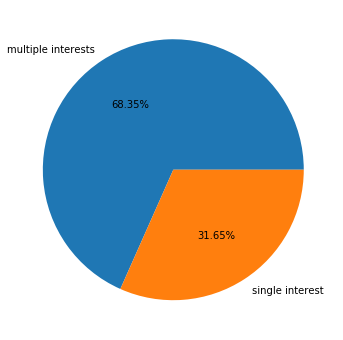

In [12]:
jobroleinterests = survey.JobRoleInterest
#Droping null values, so we can split the strings without provocing errors
jobroleinterests = jobroleinterests.dropna()

single_interests = jobroleinterests.str.split(',').apply(lambda x: len(x) == 1).value_counts(normalize = True)*100
plt.figure(figsize = (6,6))
single_interests.plot.pie(labels = ['multiple interests', 'single interest'], autopct = '%.2f%%')
plt.ylabel('')

## Results

About 68% of all participants are interested in multiple job roles. But in this case their entry under `JobRoleInterest` is a list of all the fields they are interested in. This needs to be taken into account when analyzing the data.

In [14]:
#Finding out what part of the population in this survey are potential customers for the new website:

mobile_or_web = jobroleinterests.str.contains('Web Developer|Mobile Developer')
print(str(round(mobile_or_web.sum()/jobroleinterests.shape[0]*100)) + '% of all participants are in our demographic')

86.0% of all participants are in our demographic


This means that the survey is quite relevant to our research.

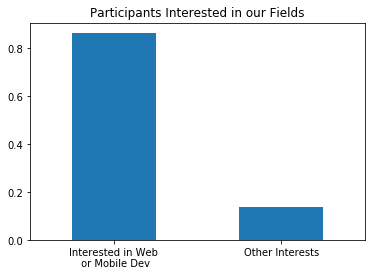

In [15]:
mobile_or_web.value_counts(normalize = True).plot.bar(title = 'Participants Interested in our Fields')
plt.xticks([0,1], ['Interested in Web\n or Mobile Dev', 'Other Interests'], rotation = 0)
plt.show()

The overwhelming majority of participants is in our demographic. So this dataset can be used effectively.

In [17]:
#Dropping all rows with NULL values in the JobRoleInterest column
print(survey.shape)
survey_no_na = survey.dropna(subset = ['JobRoleInterest'], axis = 0).copy()
print(survey_no_na.shape)

(18175, 136)
(6992, 136)


In [18]:
#Frequency tables for the countries
print(survey_no_na.CountryLive.value_counts().head())
survey_no_na.CountryLive.value_counts(normalize = True).head()*100

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64


United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

The most promising markets seem to be the countries with a large number of English speakers (USA, India, UK, Canada). Due to the fact that we are building a monetized website, while the data we are using is from the user base of a free website, we should look at the amount people are willing to spend on learning in each country, to see which countries are viable.

In [19]:
# exchanging all 0 values for months programming to 1 so we don't divide by 0
survey_no_na.loc[survey_no_na.MonthsProgramming == 0, 'MonthsProgramming'] = 1

survey_no_na['money_per_month'] = survey_no_na.MoneyForLearning/survey_no_na.MonthsProgramming

In [20]:
survey_country = survey_no_na.groupby('CountryLive')
survey_country.money_per_month.apply(np.mean)[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

It seems like the students from the USA spend the most money, whereas the UK sticks out with the least spent per month. India, which has the second most students also spends the second most money per month on learning. So the two best markets to advertise judging by the mean to would be the USA and India. But this statement is only based on the mean, which is currently the only thing we know about the data. We should investigate the data further. But in general the data is plausible, since in the UK and Canada education is free and people will be unwilling to pay for services their government provides free of charge.

In [21]:
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
survey_no_na.dropna(subset = ['CountryLive'], inplace = True)
survey_top_4 = survey_no_na.loc[survey_no_na.CountryLive.str.
                                contains('''United States of America|India|United Kingdom|Canada''')].copy()

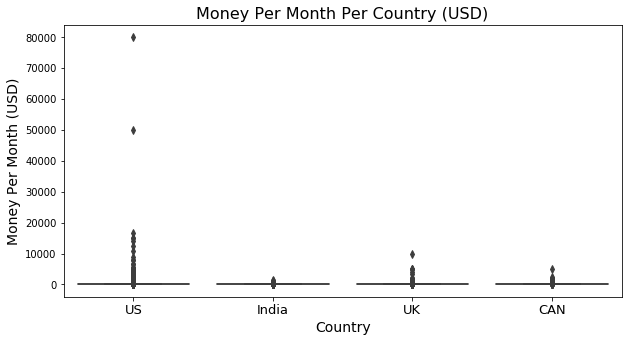

In [22]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = survey_top_4)
plt.title('Money Per Month Per Country (USD)', fontsize = 16)
plt.ylabel('Money Per Month (USD)', fontsize = 14)
plt.xlabel('Country', fontsize = 14)
plt.xticks([0,1,2,3], ['US', 'India', 'UK', 'CAN'], fontsize = 13)
plt.show()

### Results

This plot doesn't tell us much about the data, except that someone apparently put their terrible American college experience into the data. There are two outliers when we look at the data from the US participants. These are 80000 and 50000 USD per month. A likely cause of this unreasonable data is the phrasing of the questions. It asks how much people have spent on education and how long they have been coding. If their eduction is not in coding, they will have answered correctly and still given us unreasonable data. This is likely the cause of all data points of above 5000 USD per month. The way the questions are phrased in the survey makes them unsuited to answer our question. But if we want at least usable data we should exclude all datapoints above 2000 USD per month or even lower, since college eduction in almost all countries except the US cost way less than that amount.

We will start by eliminating the extreme outliers:

In [23]:
print(survey_top_4.shape)
survey_top_4 = survey_top_4.loc[survey_top_4.money_per_month < 20000]
print(survey_top_4.shape)

(4228, 137)
(3913, 137)


It seems we had to exclude quite a lot of participants

Recalculating the mean money spent per month

In [24]:
survey_top_4.groupby('CountryLive').mean()['money_per_month'].sort_values(ascending = False)

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

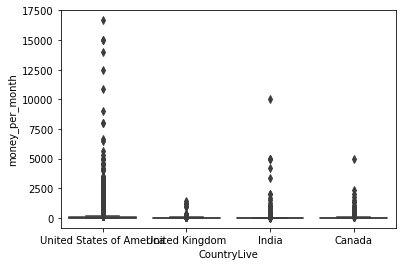

In [25]:
sns.boxplot(x = 'CountryLive', y = 'money_per_month', data = survey_top_4)

There are still seveal outliers. The US population still has a lot of people still reporting over 5000 USD per month in spending. In india there are several participants who particularly stick out. Apparently coding bootcamps are very expensive, so we need to check wethere these participants took part in any of those.

In [26]:
survey_top_4.loc[(survey_top_4.money_per_month > 3000) & (survey_top_4.CountryLive == 'India')]
bootcamp_cols = survey_top_4.columns[survey_top_4.columns.str.contains('Bootcamp', flags = re.I)].tolist()

In [27]:
print(survey_top_4.loc[(survey_top_4.money_per_month > 3000) &
                       (survey_top_4.CountryLive == 'India')
                       ,bootcamp_cols])

       AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728                0.0             NaN                NaN          NaN   
1755                0.0             NaN                NaN          NaN   
7989                0.0             NaN                NaN          NaN   
8126                0.0             NaN                NaN          NaN   
13398               0.0             NaN                NaN          NaN   
15587               0.0             NaN                NaN          NaN   

       BootcampRecommend  CodeEventWkdBootcamps  
1728                 NaN                    NaN  
1755                 NaN                    NaN  
7989                 NaN                    NaN  
8126                 NaN                    NaN  
13398                NaN                    NaN  
15587                NaN                    NaN  


So none of the participants from India who spent over 3000 USD on education reported that they attended any coding bootcamps. At this point DataQuest recommends removing all Indians who spent over 2500 USD on education.

In [28]:
print(survey_top_4.shape)
survey_top_4 = survey_top_4.drop(index = survey_top_4.loc[
    (survey_top_4.money_per_month > 2500)
                       & (survey_top_4.CountryLive == 'India')].index)
print(survey_top_4.shape)

(3913, 137)
(3907, 137)


The other outliers are those from the US participants. Up until 6000 USD per month the outliers are grouped together, but above they start to separate, so we will look at those.

In [29]:
print(survey_top_4.loc
    [(survey_top_4.money_per_month > 6000) &
      (survey_top_4.CountryLive == 'United States of America'),
     bootcamp_cols])

       AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718                 1.0             0.0                0.0   
1222                1.0             0.0                0.0   
3184                1.0             1.0                0.0   
3930                0.0             NaN                NaN   
6805                1.0             1.0                1.0   
7198                0.0             NaN                NaN   
7505                1.0             0.0                1.0   
9778                1.0             0.0                1.0   
16650               0.0             NaN                NaN   
16997               0.0             NaN                NaN   
17231               0.0             NaN                NaN   

                                 BootcampName  BootcampRecommend  \
718    The Coding Boot Camp at UCLA Extension                1.0   
1222                            The Iron Yard                1.0   
3184                           We Can Code IT      

Most of the Americans that have spent more than 6000 USD on education per month have also attended boot camps. This means that probably this information seems reliable and we can keep the data points in the analysis

In [30]:
survey_top_4.groupby('CountryLive').mean().money_per_month.sort_values(ascending = False)

CountryLive
United States of America    183.800110
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
Name: money_per_month, dtype: float64

According to these results, The two best markets for advertising would be those of the US and Canada as they are the two countries where residents spend the most money per month on education.

It should be said, however that there are more potential customers in India, since more of the participants in the original survey were from India. So advertising there might be a good idea as well. In addition most educated Indians speak English very well, due to the countries colonial history. The cultural differences between India and the rest would be much larger than between Canada and the US, which would have to be taken into consideration when advertising. More analysis is needed.

The target price per month is 59 USD. Now to find out what part of the Indian participants would be willing to spend this much on education per month.

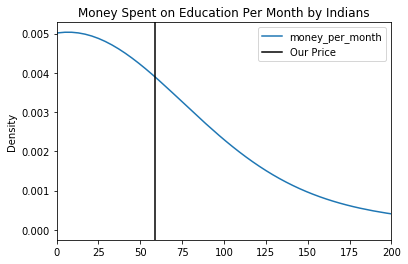

In [32]:
data_countries = survey_top_4.groupby('CountryLive')
data_countries.get_group('India').money_per_month.plot.kde(
    title = 'Money Spent on Education Per Month by Indians',
    xlim = (0,200))
plt.axvline(59, color = 'k', label = 'Our Price')
plt.legend()
plt.show()

We can see that only a small group is willing to pay as much money as we would be asking in India

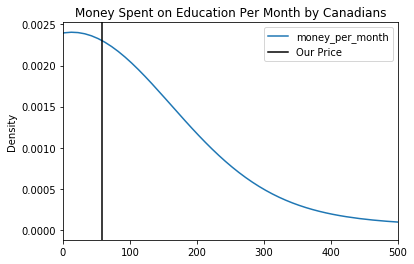

In [33]:
data_countries.get_group('Canada').money_per_month.plot.kde(xlim = (0,500),
    title = 'Money Spent on Education Per Month by Canadians')
plt.axvline(59, color = 'k', label = 'Our Price')
plt.legend()
plt.show()

In general the Canadians also seem very unhappy with spending the amount targeted.

### z-value

The Standard score or z-value is the number of standard deviations a value is separated from the mean of a value. This means that the z-value can be used as a measure of each country's participants to spend 59 USD on the new website:

In [34]:
def z_val(val, arr):
    '''Calculate the z-value of a value relative to the values in an array
    Args:
        val (float, int): value of which the z-value should be calculated
        arr (numpy array of dtype float or int): array with values
    Returns:
        float: z-value of val relative to the values in the array arr
    '''
    return (val - np.mean(arr)) / np.std(arr)

In [35]:
print('Z-value in India: '+
      str(round(z_val(59, data_countries.get_group('India').money_per_month),4)))
print('Z-value in Canada: '+
      str(round(z_val(59, data_countries.get_group('Canada').money_per_month),4)))

Z-value in India: -0.029
Z-value in Canada: -0.1239


In [40]:
print(np.mean(data_countries.get_group('India').money_per_month))
print(np.mean(data_countries.get_group('Canada').money_per_month))

65.75876291230809
113.51096098711231


### Results

The z-values of each country show, that Canadians are willing to spend much more than the price goal of 59 USD whereas the average willingness to spend money of Indians is slightly above, but very close to the goal. This means that a larger part of the Canadian population would be willing to spend the money.

But it must be said, of course, that the Indian population is much higher than that of Canada, so a smaller fraction of a much larger population could mean more potential customers.

To put this data into perspective, we should look at what percentage of potential customers actually comes from what country.

In [42]:
survey_top_4.CountryLive.value_counts(normalize = True)*100

United States of America    75.019196
India                       11.696954
United Kingdom               7.141029
Canada                       6.142821
Name: CountryLive, dtype: float64

We can see that a large majority of our potential user base comes from the US. This in addition to the fact that Americans are the largest spenders on average implies the idea, that a large majority of the advertising budget should be spent on the US market. 

Advertising in Canada in addition to the US would probably not increase the cost of the advertising campaign significantly, because of the similarity in culture of the US and Canada, the same adverts could likely be used. In addition, the close geographic proximity of the two countries would allow hardware, such as servers to be used by both groups

Expanding into the Indian market would be a logical next step. Even though the price goal of 59 USD is very close to the average Indian's spending potential per month, the giant population and possible market make India a very promising market. In addition a small drop in price for that region could increase the potential impact of an advertising campaign even further.

It might be a good idea just to advertise in the US at first and explore expansion into later markets later on. The US is ideal for this sort of monetized education, since they pay horrendous sums of money for their college education and our service will seem like a bargain.

If there was a marketing team in the company, their decision would be more educated on these matters.

## Conclusions

In this project, data from a survey conducted by the website FreeCodingAcademy was analyzed with the intent of being able to make well-founded marketing decisions in a new education platform focused on Web and Mobile development. 

The results showed that in this case the main focus of the advertising campaign should be the US. As a second market, Canada might be interesting, but this is not clear, since there are a lot less potential users in Canada and they are willing to spend less on education. But advertising there would require very little change compared to the advertising campaign in the US.

The Indian market is a huge potential next market, but would require additional steps when advertising and setting up infrastructure to host the service.